In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
plt.style.use(['science', 'no-latex', 'notebook', 'grid'])

In [7]:
# Загружаем данные
power_10 = pd.read_csv('10_percent.csv').rename(columns={'1': "seconds", '42': "temperature"})
power_15 = pd.read_csv('15_percent.csv').rename(columns={'1': "seconds", '43': "temperature"})
power_20 = pd.read_csv('20_percent.csv').rename(columns={'1': "seconds", '34': "temperature"})
power_25 = pd.read_csv('25_percent.csv').rename(columns={'1': "seconds", '22': "temperature"})
power_30 = pd.read_csv('30_percent.csv').rename(columns={'1': "seconds", '48': "temperature"})
power_35 = pd.read_csv('35_percent.csv').rename(columns={'1': "seconds", '57': "temperature"})
power_40 = pd.read_csv('40_percent.csv').rename(columns={'1': "seconds", '69': "temperature"})

# Cоздаём новый столбец- мощность
power_10['power'] = 10
power_15['power'] = 15
power_20['power'] = 20
power_25['power'] = 25
power_30['power'] = 30
power_35['power'] = 35
power_40['power'] = 40

# Объединяем данные
melt_df = pd.concat([power_10, power_15, power_20, power_25, power_30, power_35, power_40], ignore_index=True)

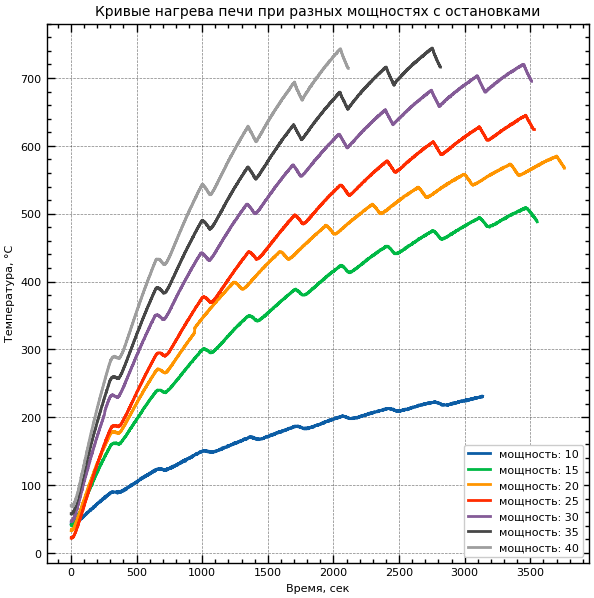

In [8]:
BIG_SIZE = 12
MEDIUM_SIZE = 10
SMALL_SIZE = 8

# Разделяем данные по столбцам
df = melt_df.groupby(['seconds', 'power'])['temperature'].mean().unstack('power')

# Создаём фигуру и настраиваем отступы для графиков
fig, axes = plt.subplots(figsize=(7, 7))

axes.plot(df.index, df[10], label='мощность: 10')
axes.plot(df.index, df[15], label='мощность: 15')
axes.plot(df.index, df[20], label='мощность: 20')
axes.plot(df.index, df[25], label='мощность: 25')
axes.plot(df.index, df[30], label='мощность: 30')
axes.plot(df.index, df[35], label='мощность: 35')
axes.plot(df.index, df[40], label='мощность: 40')

# Добавляем подписи на оси
axes.set_xlabel('Время, сек', fontsize=SMALL_SIZE)
axes.set_ylabel('Температура, °С', fontsize=SMALL_SIZE)
# Добавляем заголовок
axes.set_title('Кривые нагрева печи при разных мощностях с остановками', fontsize=MEDIUM_SIZE)
# Настраиваем размер легенды и подписей осей
axes.legend(loc='lower right', fontsize=8)
axes.tick_params(axis='both', which='both', labelsize=SMALL_SIZE)

plt.show()